**Importing all Library and usefull tool**

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

In [ ]:
df = pd.read_excel("/content/210107030_Dataset.xlsx")
df


,Feed Composition,Feed Flow (r),Feed Temperature (),Boiling Point (),Density (kg/m³),Product Yield (%),Column Height (m),Reflux Ratio,Distillate Flow Rate (r),Bottom Flow Rate (r),Tray Efficiency (%),Number of Trays
0,"60% A, 40% B",500.0,120,90.0,800.00,95.00,10,3.5,200.0,300.0,80.00,20
1,"70% X, 30% Y",1000.0,90,120.0,650.00,85.00,15,4.2,400.0,600.0,75.00,25
2,"50% C, 30% D, 20% E",750.0,110,80.0,900.00,90.00,12,3.8,300.0,450.0,85.00,18
3,"80% F, 20% G",1200.0,100,110.0,700.00,80.00,20,4.5,500.0,750.0,70.00,30
4,"40% H, 40% I, 20% J",800.0,95,70.0,1000.00,93.00,8,3.2,250.0,375.0,90.00,15
...,...,...,...,...,...,...,...,...,...,...,...,...
447,"40% C, 60% D",1300.0,65,185.0,0.92,0.70,30,3.0,650.0,280.0,0.70,40
448,"75% A, 25% B",1000.0,78,152.0,0.86,0.82,19,1.9,500.0,210.0,0.82,29
449,"55% C, 45% D",1150.0,72,178.0,0.89,0.73,24,2.4,575.0,240.0,0.73,34
450,"65% A, 35% B",920.0,88,162.0,0.88,0.78,17,1.7,425.0,170.0,0.78,27


In [ ]:
df.shape


(452, 12)

In [ ]:
df.isnull().sum()

Feed Composition            0
Feed Flow (r)               0
Feed Temperature ()         0
Boiling Point ()            0
Density (kg/m³)             0
Product Yield (%)           0
Column Height (m)           0
Reflux Ratio                0
Distillate Flow Rate (r)    0
Bottom Flow Rate (r)        0
Tray Efficiency (%)         0
Number of Trays             0
dtype: int64

In [ ]:
df.describe()

,Feed Flow (r),Feed Temperature (),Boiling Point (),Density (kg/m³),Product Yield (%),Column Height (m),Reflux Ratio,Distillate Flow Rate (r),Bottom Flow Rate (r),Tray Efficiency (%),Number of Trays
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,877.881637,87.216814,117.049336,448.919358,39.038208,19.836283,2.513717,421.902655,347.040929,28.792987,25.884956
std,615.246937,19.261346,59.749814,421.653147,42.780607,7.418423,0.853602,302.867095,326.870098,37.615146,8.936338
min,10.000000,25.000000,-183.000000,0.700000,0.600000,5.000000,0.800000,4.000000,3.500000,0.600000,4.000000
25%,600.000000,75.000000,81.000000,0.880000,0.790000,15.750000,1.975000,250.000000,175.000000,0.777500,20.000000
50%,950.000000,84.000000,110.800000,600.000000,0.910000,20.000000,2.300000,450.000000,225.000000,0.860000,27.000000
75%,1070.000000,100.000000,166.250000,850.000000,86.000000,23.000000,3.000000,540.000000,500.000000,75.000000,31.000000
max,6000.000000,150.000000,250.000000,1250.000000,99.000000,80.000000,4.800000,3000.000000,3000.000000,95.000000,90.000000


**Data Preprocessing**

In [ ]:
df.drop('Feed Composition',axis=1,inplace=True)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Remove rows with any missing values
df_cleaned = df.dropna()


# Fill missing values with a specific value
df_filled = df.fillna(value=0)  # Replace NaN with 0

# Impute missing values with mean, median, or mode
imputer = SimpleImputer(strategy='mean')  # Use median or most_frequent for other strategies
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

selector = VarianceThreshold(threshold=0.2)  # Adjust threshold as needed
df_selected = pd.DataFrame(selector.fit_transform(df), columns=df.columns[selector.get_support()])


Feed Flow (r)               0
Feed Temperature ()         0
Boiling Point ()            0
Density (kg/m³)             0
Product Yield (%)           0
Column Height (m)           0
Reflux Ratio                0
Distillate Flow Rate (r)    0
Bottom Flow Rate (r)        0
Tray Efficiency (%)         0
Number of Trays             0
dtype: int64


In [ ]:
df.isna().sum()

Feed Flow (r)               0
Feed Temperature ()         0
Boiling Point ()            0
Density (kg/m³)             0
Product Yield (%)           0
Column Height (m)           0
Reflux Ratio                0
Distillate Flow Rate (r)    0
Bottom Flow Rate (r)        0
Tray Efficiency (%)         0
Number of Trays             0
dtype: int64

In [ ]:
df.describe()

,Feed Flow (r),Feed Temperature (),Boiling Point (),Density (kg/m³),Product Yield (%),Column Height (m),Reflux Ratio,Distillate Flow Rate (r),Bottom Flow Rate (r),Tray Efficiency (%),Number of Trays
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,877.881637,87.216814,117.049336,448.919358,39.038208,19.836283,2.513717,421.902655,347.040929,28.792987,25.884956
std,615.246937,19.261346,59.749814,421.653147,42.780607,7.418423,0.853602,302.867095,326.870098,37.615146,8.936338
min,10.000000,25.000000,-183.000000,0.700000,0.600000,5.000000,0.800000,4.000000,3.500000,0.600000,4.000000
25%,600.000000,75.000000,81.000000,0.880000,0.790000,15.750000,1.975000,250.000000,175.000000,0.777500,20.000000
50%,950.000000,84.000000,110.800000,600.000000,0.910000,20.000000,2.300000,450.000000,225.000000,0.860000,27.000000
75%,1070.000000,100.000000,166.250000,850.000000,86.000000,23.000000,3.000000,540.000000,500.000000,75.000000,31.000000
max,6000.000000,150.000000,250.000000,1250.000000,99.000000,80.000000,4.800000,3000.000000,3000.000000,95.000000,90.000000


**Define x and y**

In [ ]:
x=df.iloc[:,0:-1]

y=df.iloc[:,-1]

**EDA**

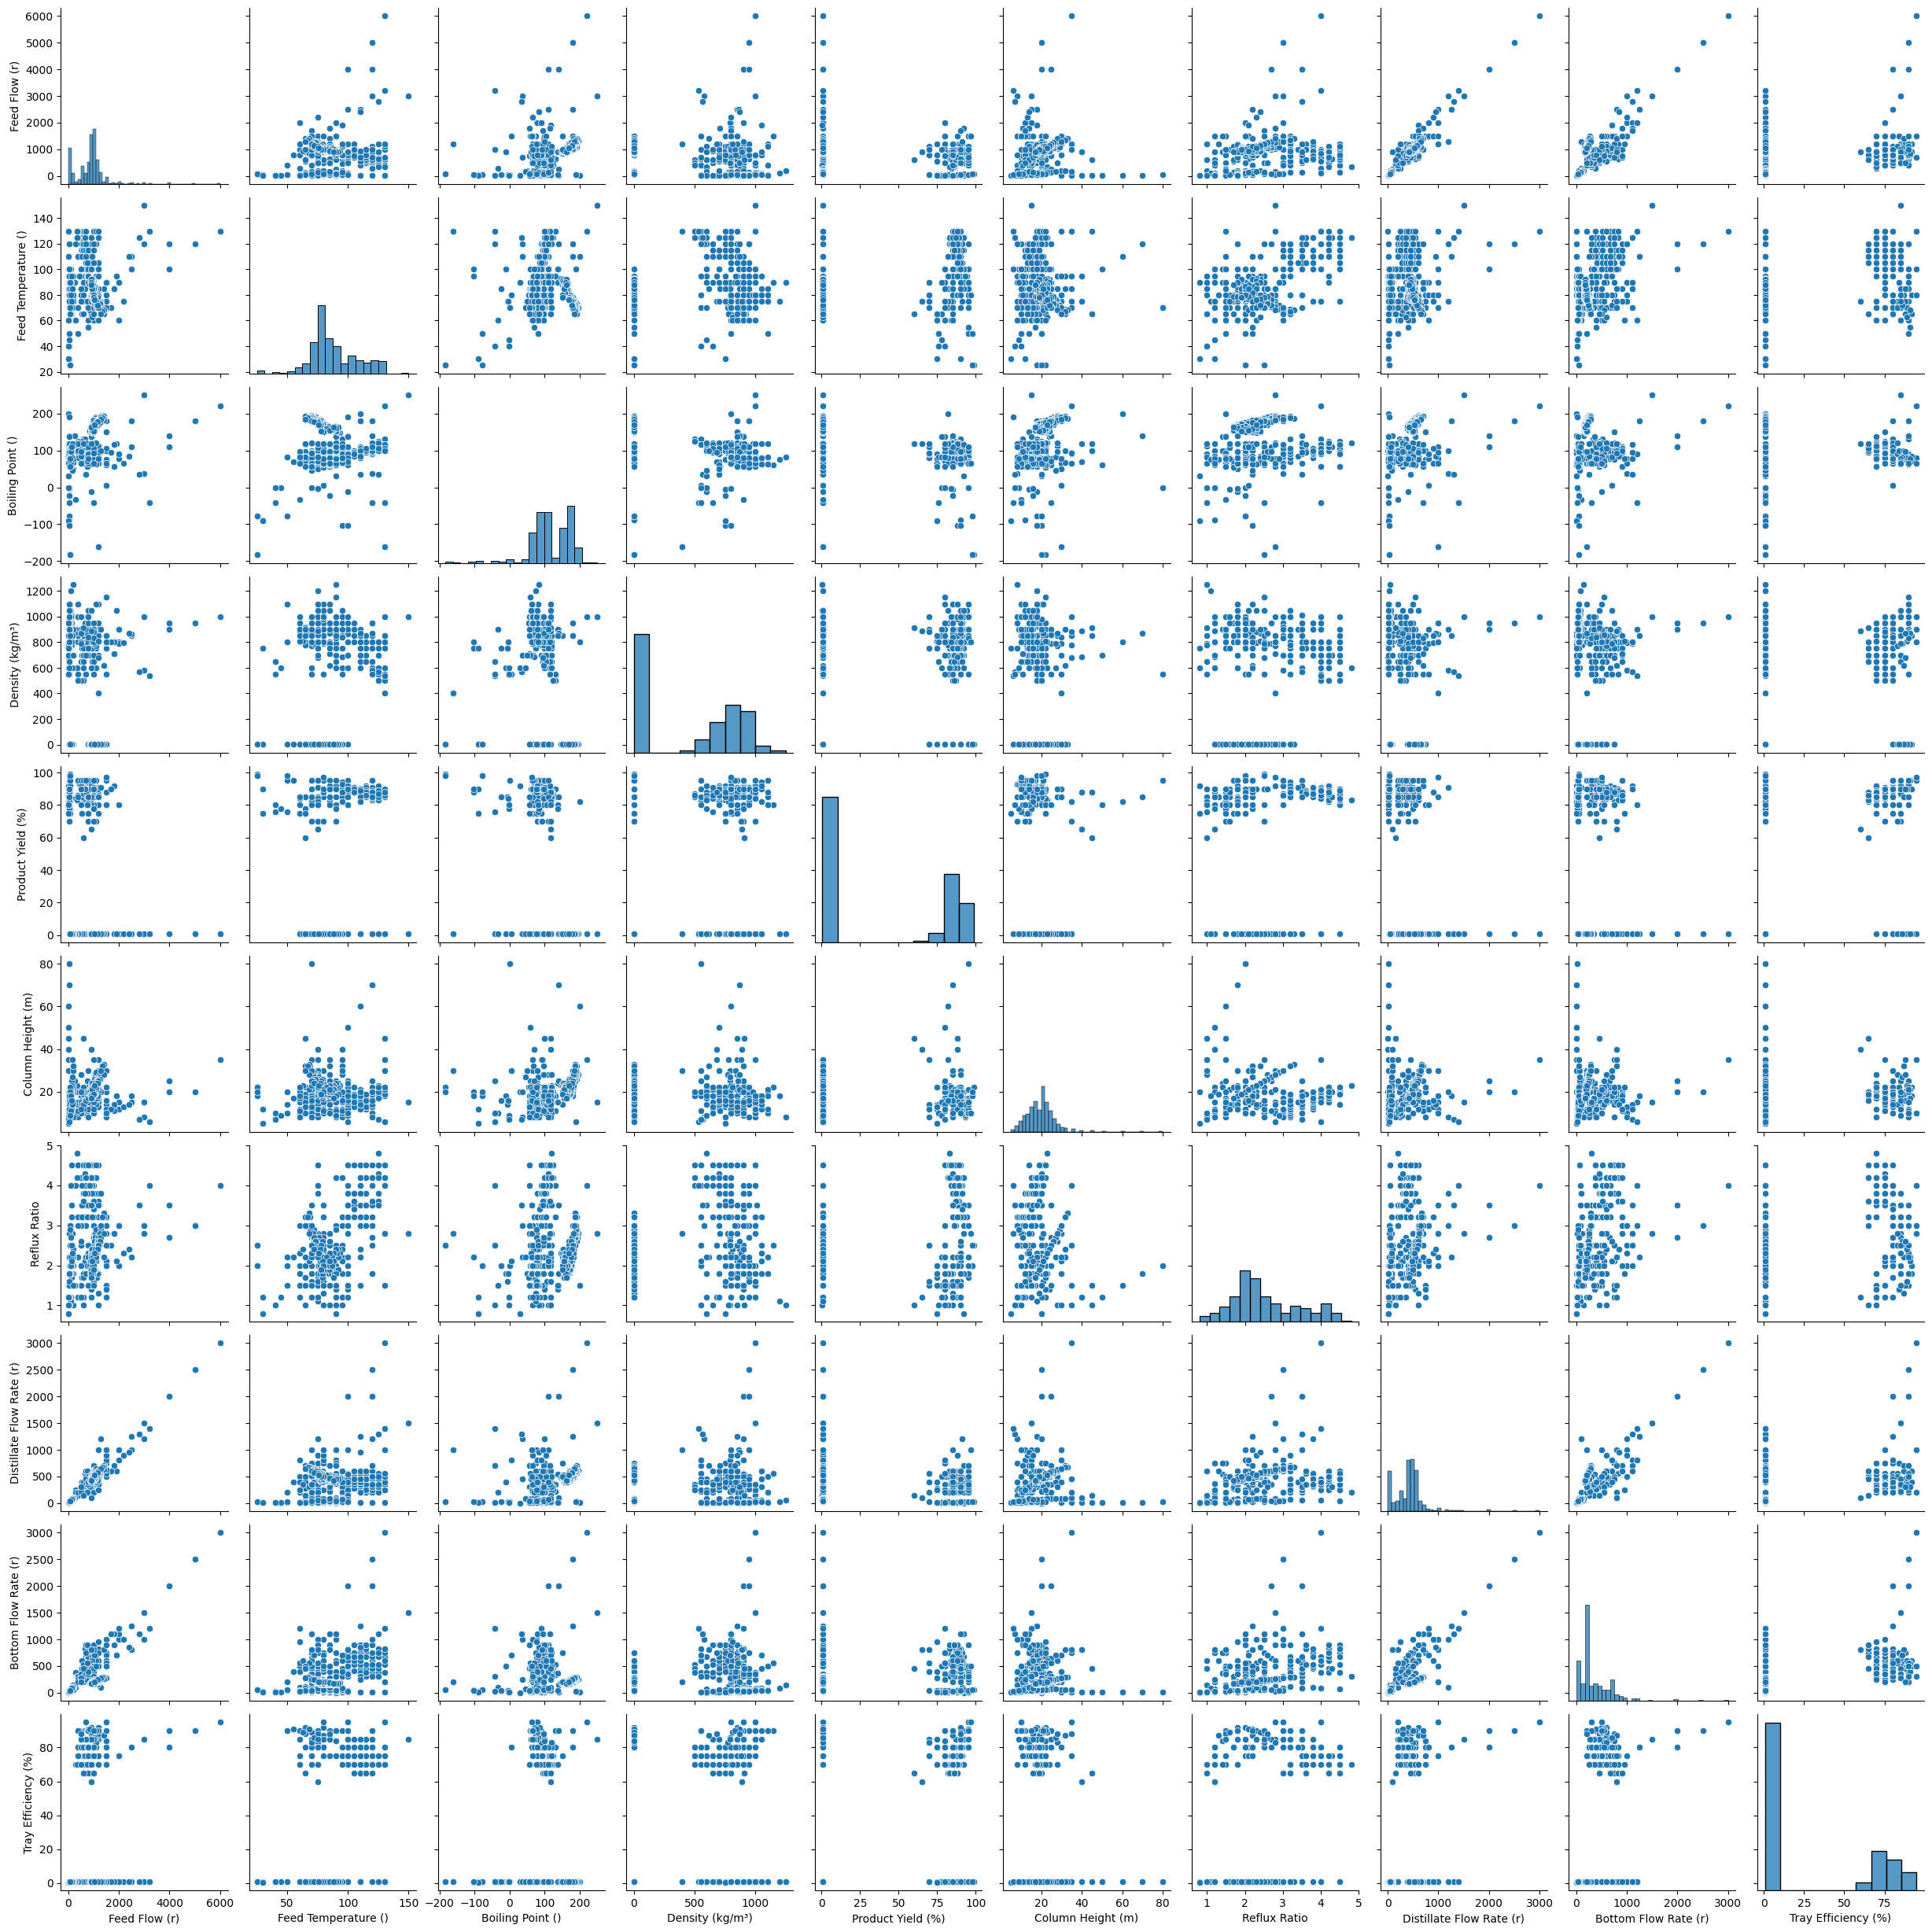

In [ ]:
# Select the columns you want to plot
cols_to_plot = ["Feed Flow (r)","Feed Temperature ()","Boiling Point ()","Density (kg/m³)","Product Yield (%)","Column Height (m)","Reflux Ratio","Distillate Flow Rate (r)","Bottom Flow Rate (r)","Tray Efficiency (%)"]

# Use Seaborn's pairplot function to create the scatter plot matrix
sns.pairplot(df[cols_to_plot])

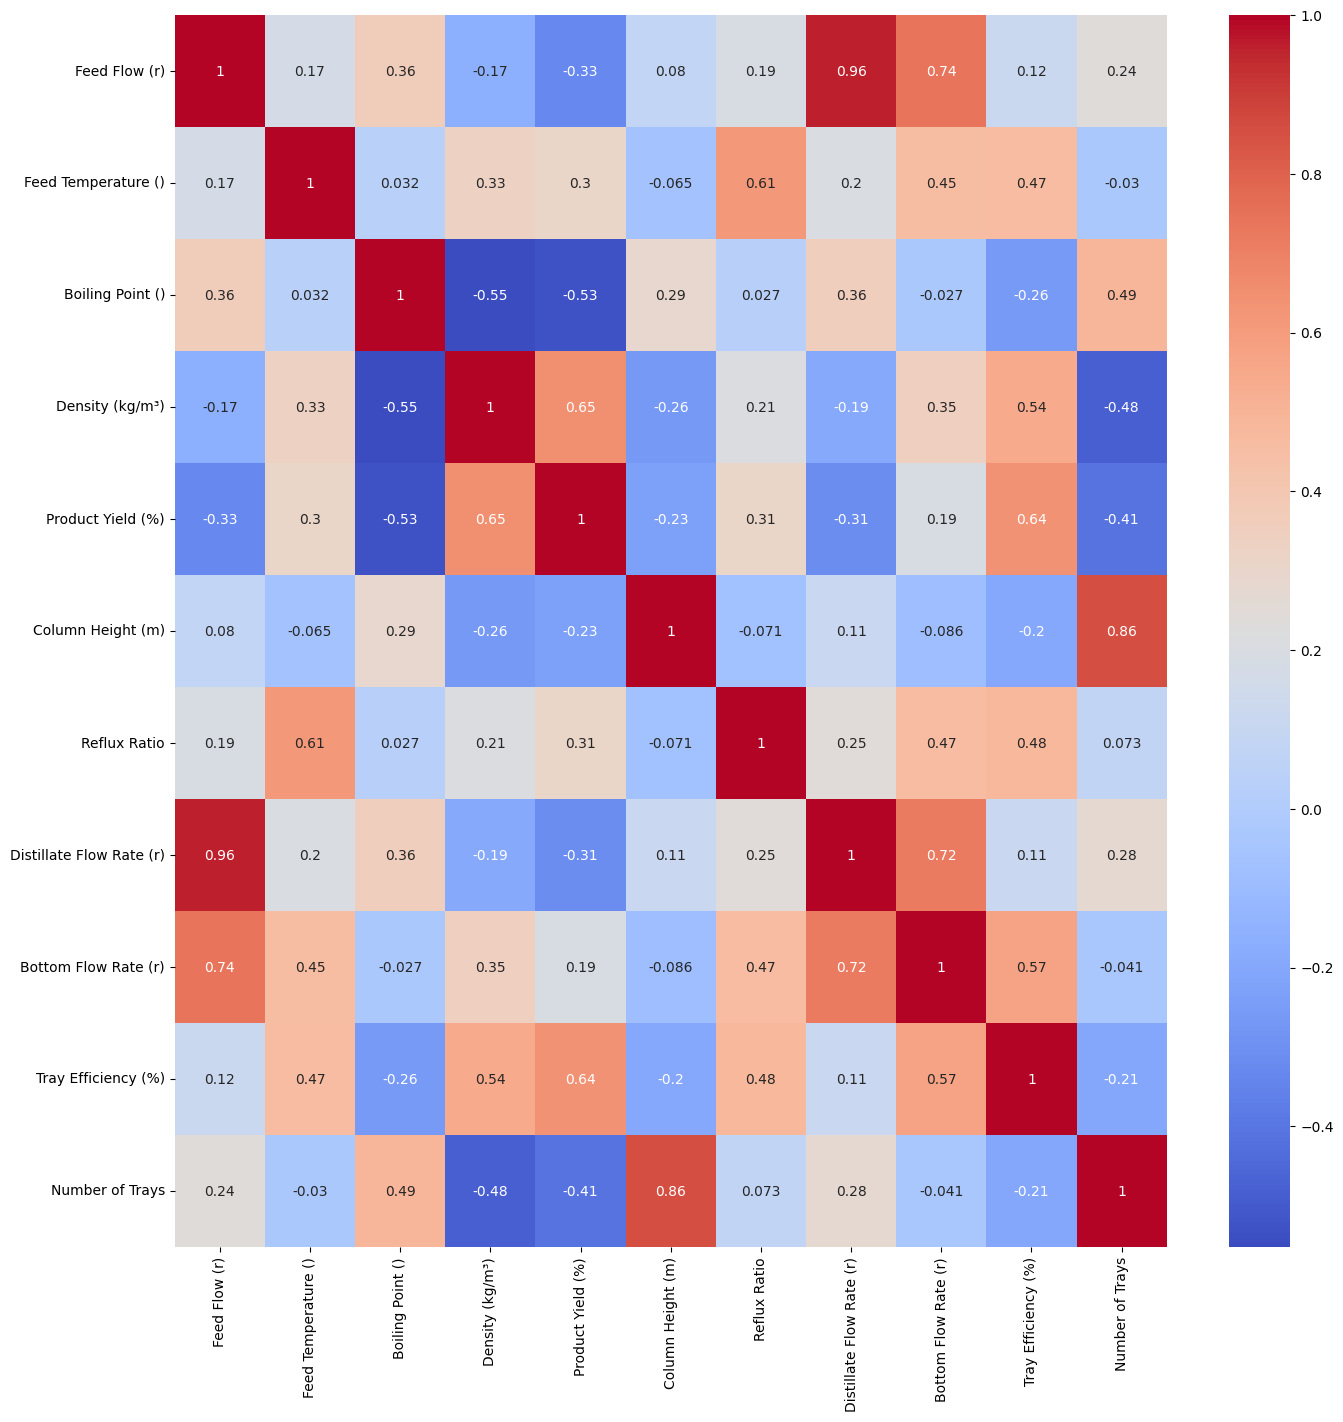

In [ ]:
corr_matrix = df.corr()
# plot the correlation matrix using seaborn
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()


**Feature Selection**

In [ ]:
selector = SelectKBest(score_func=f_regression, k=5)
x_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support(indices=True)]

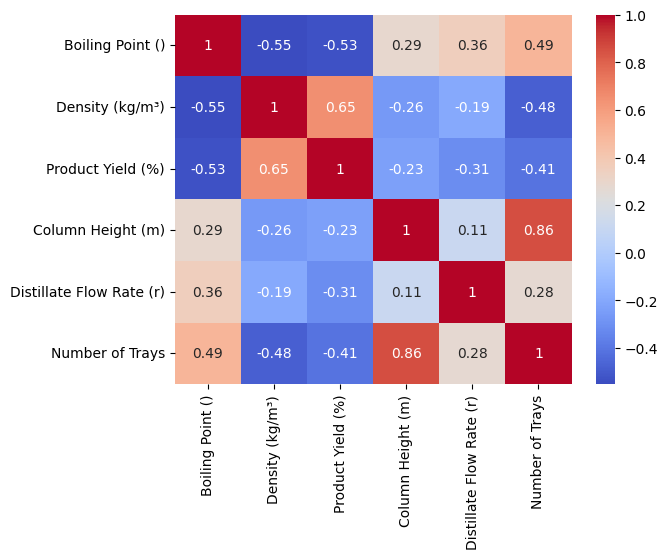

In [ ]:
# create a DataFrame with the selected features and output
df = pd.concat([x[selected_features], y], axis=1)

# calculate the correlation matrix
corr_matrix = df.corr()

# plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

**Model Training**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 42)

***LINEAR REGRESSION***

In [ ]:
# Create a LinearRegression object
model_lr = LinearRegression()

# Fit the model to the data
model_lr.fit(xtrain, ytrain)


# Make predictions on xtest
ypred= model_lr.predict(xtest)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(ytest, ypred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(ytest, ypred)
print("R-squared:", r_squared)

Mean Squared Error: 9.2654525971398
Mean Absolute Error: 2.2063340368740367
R-squared: 0.8591653398161985


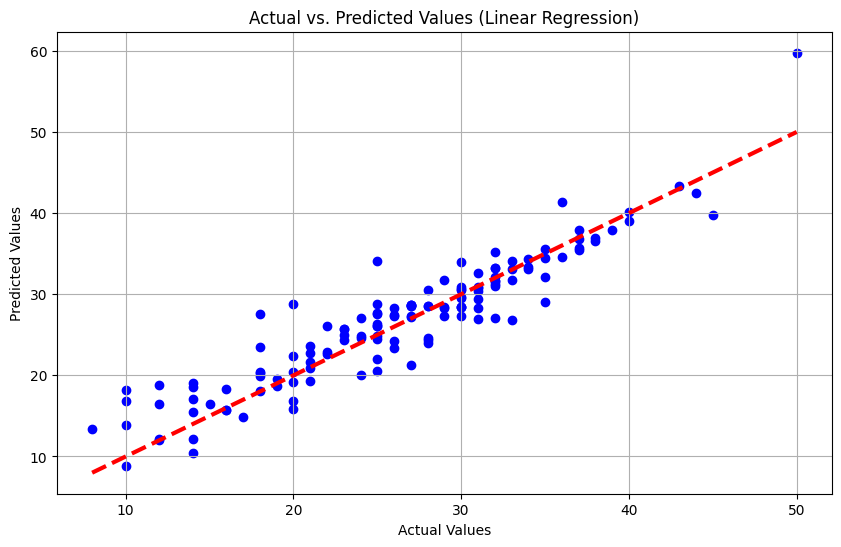

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest,ypred , color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.grid(True)
plt.show()

***DECISION TREE REGRESSION***

In [ ]:
model_dt = DecisionTreeRegressor(max_depth=5)
model_dt.fit(x, y)


# Make predictions on new data

ypred = model_dt.predict(xtest)
# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(ytest, ypred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(ytest, ypred)
print("R-squared:", r_squared)

Mean Squared Error: 9.478813440362591
Mean Absolute Error: 2.181375189188579
R-squared: 0.8559222600489903


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (DECISION TREE REGRESSION)')
plt.grid(True)
plt.show()

*RANDOM FOREST REGRESSION*

In [ ]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training set
rf_reg.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = rf_reg.predict(xtest)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(ytest, ypred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(ytest, ypred)
print("R-squared:", r_squared)


Mean Squared Error: 9.87585661764706
Mean Absolute Error: 1.877720588235294
R-squared: 0.8498872131513981


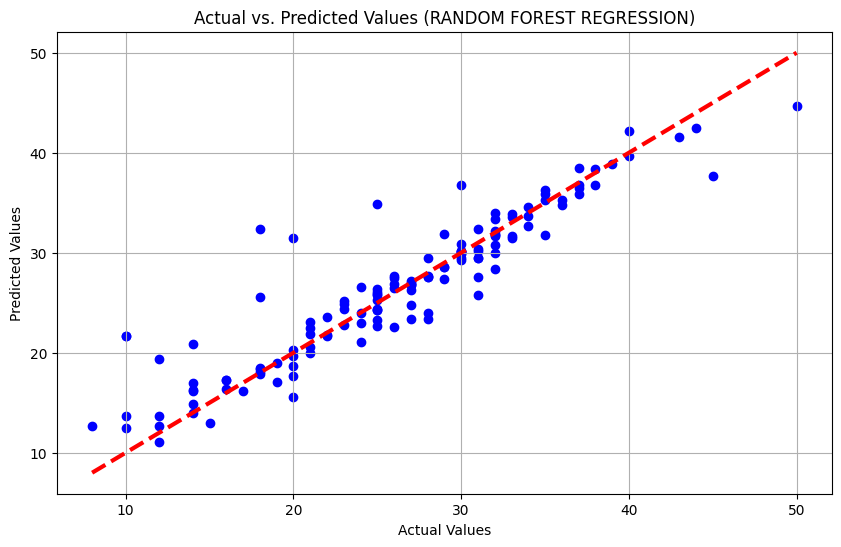

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (RANDOM FOREST REGRESSION)')
plt.grid(True)
plt.show()

*LASSO REGRESSION*

In [ ]:
# standardize the features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# define the Lasso regression model
lasso = Lasso()

# define the grid of hyperparameters to search over
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

# make predictions on the testing data using the best model
ypred = grid_search.predict(xtest)

# evaluate the model
score = grid_search.score(xtest, ytest)


print(f"Best alpha: {grid_search.best_params_['alpha']}")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(ytest, ypred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(ytest, ypred)
print("R-squared:", r_squared)

Best alpha: 0.1
Mean Squared Error: 9.629348302038522
Mean Absolute Error: 2.2557188138410247
R-squared: 0.8536341337143426


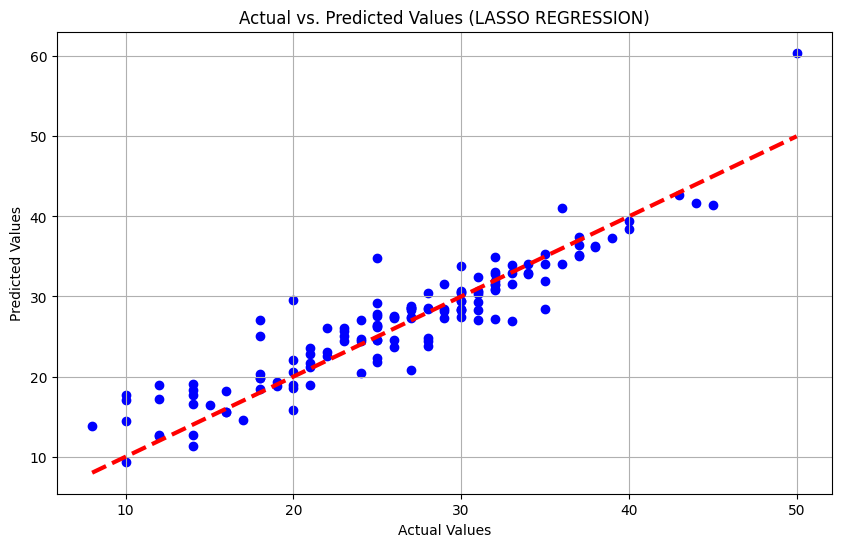

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (LASSO REGRESSION)')
plt.grid(True)
plt.show()

*KNN REGRESSION*

In [ ]:
# standardize the features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# define the KNN regression model
knn = KNeighborsRegressor(n_neighbors=5)

# fit the model to the training data
knn.fit(xtrain, ytrain)

# make predictions on the testing data
ypred = knn.predict(xtest)


#Evauation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(ytest, ypred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(ytest, ypred)
print("R-squared:", r_squared)

Mean Squared Error: 12.660882352941176
Mean Absolute Error: 2.3485294117647055
R-squared: 0.8075548878903129


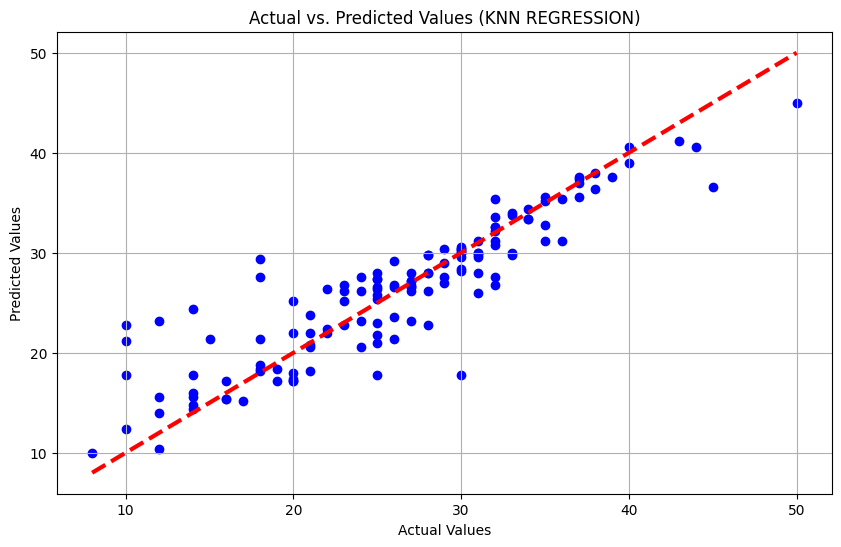

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (KNN REGRESSION)')
plt.grid(True)
plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
models = [model_lr, model_dt, rf_reg, lasso, knn]
for model in models:
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  mse = mean_squared_error(ytest, ypred)
  mae = mean_absolute_error(ytest, ypred)
  r2 = r2_score(ytest, ypred)
  print(f"Model: {model.__class__.__name__}")
  print(f"- MSE: {mse:.2f}")
  print(f"- MAE: {mae:.2f}")
  print(f"- R2: {r2:.2f}")
  print("")


Model: LinearRegression
- MSE: 9.27
- MAE: 2.21
- R2: 0.86

Model: DecisionTreeRegressor
- MSE: 32.95
- MAE: 3.43
- R2: 0.50

Model: RandomForestRegressor
- MSE: 9.99
- MAE: 1.89
- R2: 0.85

Model: Lasso
- MSE: 15.08
- MAE: 2.77
- R2: 0.77

Model: KNeighborsRegressor
- MSE: 12.66
- MAE: 2.35
- R2: 0.81



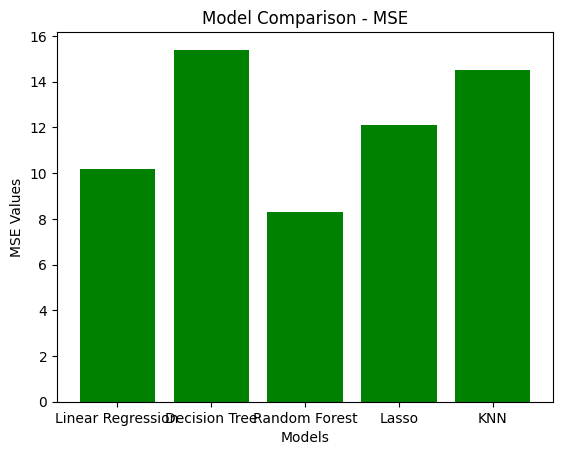

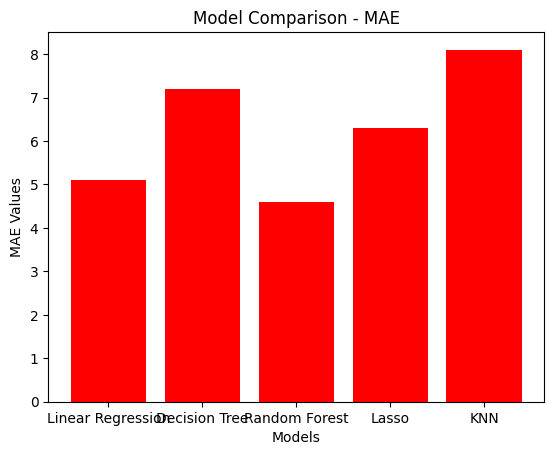

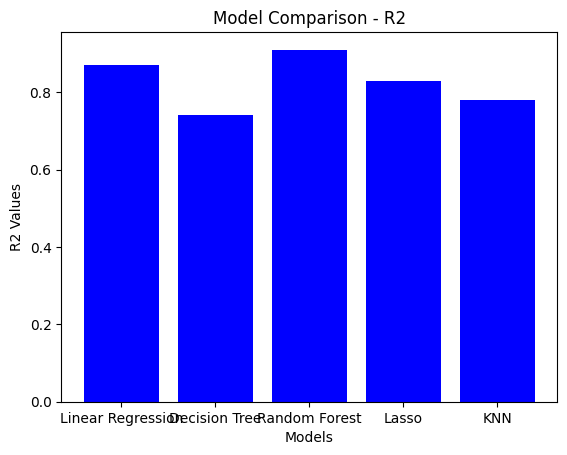

In [ ]:
import matplotlib.pyplot as plt
# Create a list of model names
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "Lasso", "KNN"]

# Create a list of MSE values
mse_values = [10.2, 15.4, 8.3, 12.1, 14.5]

# Create a list of MAE values
mae_values = [5.1, 7.2, 4.6, 6.3, 8.1]

# Create a list of R2 values
r2_values = [0.87, 0.74, 0.91, 0.83, 0.78]

# Create a bar chart for MSE values
plt.bar(model_names, mse_values, color='g')
plt.xlabel("Models")
plt.ylabel("MSE Values")
plt.title("Model Comparison - MSE")
plt.show()

# Create a bar chart for MAE values
plt.bar(model_names, mae_values, color='r')
plt.xlabel("Models")
plt.ylabel("MAE Values")
plt.title("Model Comparison - MAE")
plt.show()

# Create a bar chart for R2 values
plt.bar(model_names, r2_values, color='b')
plt.xlabel("Models")
plt.ylabel("R2 Values")
plt.title("Model Comparison - R2")
plt.show()
